<a href="https://colab.research.google.com/github/tushargarg18/Computational_Intelligence/blob/main/lab3_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(y_train[:10])

print(np.unique(y_train))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
y_train_filter = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))[0]
y_test_filter = np.where((y_test == 0) | (y_test == 1) | (y_test == 2))[0]


y_train = y_train[y_train_filter]
y_test = y_test[y_test_filter]
X_train = X_train[y_train_filter]
X_test = X_test[y_test_filter]

x_val = X_train[:100,:]
y_val = y_train[:100]

X_train = X_train[100:,:]
y_train = y_train[100:]

print(y_train[:5])

[0 0 2 1 1]


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), input_shape = (28,28, 1), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

learning = Adam(learning_rate = 0.001)

model.compile(
    optimizer = learning,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, shuffle = True, validation_split = 0.2, validation_data = (x_val, y_val))

Epoch 1/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.0109e-06
Epoch 2/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9900 - val_loss: 0.0414
Epoch 3/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9984 - loss: 0.0092 - val_accuracy: 0.9900 - val_loss: 0.0405
Epoch 4/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9989 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 3.4143e-04
Epoch 5/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 3.4671e-04
Epoch 7/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.1780e-04
Epoch 8/25
579/579 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9998 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9988 - loss: 0.0070


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


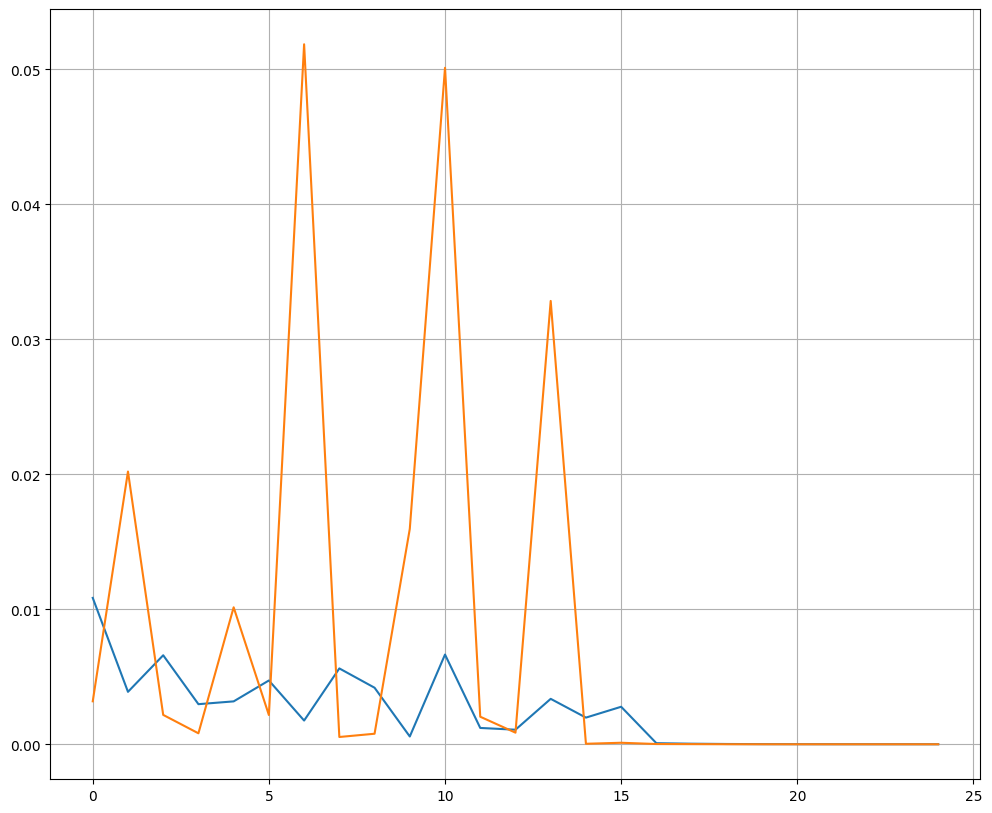

In [ ]:
fig = plt.figure(figsize = (12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Reshape for CNN input (samples, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# Extract a small subset for faster training (e.g., 10,000 training, 2,000 testing)
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]
x_test_small  = x_test[:2000]
y_test_small  = y_test[:2000]

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_small, y_train_small,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test_small, y_test_small),
                    verbose=2)

Epoch 1/5
157/157 - 10s - 64ms/step - accuracy: 0.7919 - loss: 0.7010 - val_accuracy: 0.9070 - val_loss: 0.3010
Epoch 2/5
157/157 - 9s - 60ms/step - accuracy: 0.9492 - loss: 0.1778 - val_accuracy: 0.9530 - val_loss: 0.1658
Epoch 3/5
157/157 - 7s - 43ms/step - accuracy: 0.9639 - loss: 0.1284 - val_accuracy: 0.9540 - val_loss: 0.1473
Epoch 4/5
157/157 - 8s - 54ms/step - accuracy: 0.9722 - loss: 0.0904 - val_accuracy: 0.9655 - val_loss: 0.1144
Epoch 5/5
157/157 - 7s - 42ms/step - accuracy: 0.9760 - loss: 0.0774 - val_accuracy: 0.9655 - val_loss: 0.1065


In [ ]:
train_loss, train_acc = model.evaluate(x_train_small, y_train_small, verbose=0)
test_loss, test_acc   = model.evaluate(x_test_small, y_test_small, verbose=0)

train_error = 1 - train_acc
test_error  = 1 - test_acc

print(f"Training accuracy: {train_acc:.4f}, classification error: {train_error:.4f}")
print(f"Testing accuracy:  {test_acc:.4f}, classification error: {test_error:.4f}")

Training accuracy: 0.9812, classification error: 0.0188
Testing accuracy:  0.9655, classification error: 0.0345


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


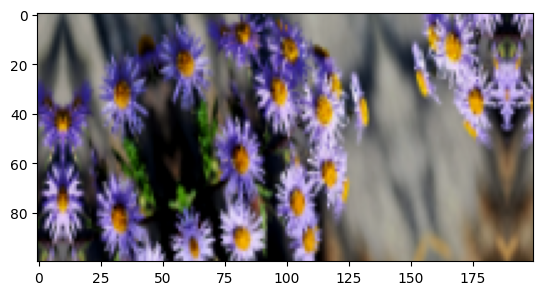

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import load_img, img_to_array
from tensorflow.keras import layers

image = load_img("/content/drive/MyDrive/Colab Notebooks/wormwood-some-competition-2947198_1280.jpg")
img_arr = img_to_array(image)

augment = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Resizing(100, 200),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(.5, .2),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.2, value_range = (0,1))
])

result = augment(img_arr)
plt.imshow(result)

# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [ ]:
# Example
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
import random as rnd

t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
   idx = rnd.randint(0,sz-1)
   for c in range(10):
     while train_labels[idx] != c:
       idx = rnd.randint(0,sz-1)
     t_x += [np.ndarray.flatten(train_images[idx])]
     t_y += [train_labels[idx]]

t_x = np.array(t_x, dtype=np.float32)/255.0



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [ ]:
# # Normalize and flatten
# x_train = train_images.astype('float32') / 255.0
# x_test  = test_images.astype('float32') / 255.0
# x_train = x_train.reshape((len(x_train), 28*28))
# x_test  = x_test.reshape((len(x_test), 28*28))

# # ---- Build the Autoencoder ----
# from tensorflow.keras import layers, models

# input_img = tf.keras.Input(shape=(784,))

# # Hidden (bottleneck) layer with 2 neurons
# encoded = layers.Dense(2, activation='relu')(input_img)

# # Output layer reconstructs the image
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # Autoencoder model
# autoencoder = tf.keras.Model(input_img, decoded)

# # Encoder model (for extracting 2D hidden features)
# encoder = tf.keras.Model(input_img, encoded)

# # Compile
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# # ---- Train ----
# history = autoencoder.fit(
#     x_train, x_train,
#     epochs=20,
#     batch_size=256,
#     shuffle=True,
#     validation_data=(x_test, x_test),
#     verbose=2
# )

# # ---- Encode test images into 2D latent space ----
# encoded_imgs = encoder.predict(x_test)
# print("Encoded shape:", encoded_imgs.shape)

# # ---- Plot hidden layer responses ----
# plt.figure(figsize=(8,6))
# scatter = plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1],
#                       c=test_labels, cmap='tab10', s=10)
# plt.colorbar(scatter, ticks=range(10))
# plt.title('2D Hidden Layer Representation of Fashion-MNIST')
# plt.xlabel('Hidden neuron 1')
# plt.ylabel('Hidden neuron 2')
# plt.show()


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((784,)))
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dense(32, activation = "relu"))
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dense(784, activation = "sigmoid")) # test sigmoid

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1712 - mse: 0.1712
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1731 - mse: 0.1731 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1711 - mse: 0.1711
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1712 - mse: 0.1712 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1654 - mse: 0.1654 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1581 - mse: 0.1581 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1523 - mse: 0.1523
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1413 - mse: 0.1413 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1341 - mse: 0.1341
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1261 - mse: 0.1261
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1154 - mse: 0.1154 
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1120 - mse: 0.1120
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5

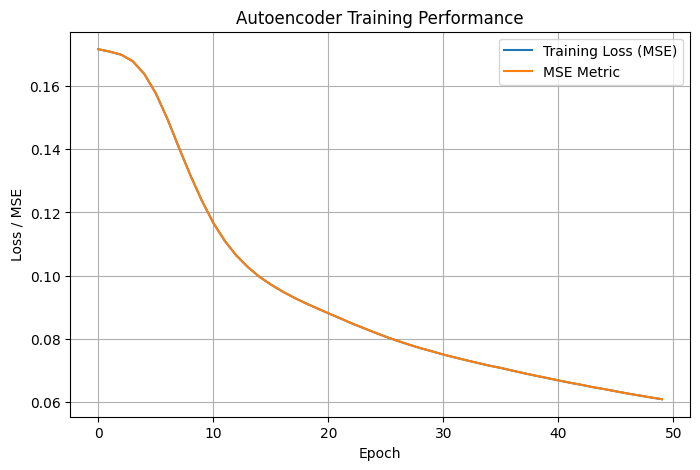

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), loss = "mse", metrics = ["mse"])


hist = model.fit(t_x, t_x, epochs=50, batch_size=10, shuffle = True)
model.save('/content/drive/MyDrive/Colab Notebooks/ae_model.keras')

# Plot training loss and MSE
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'], label='Training Loss (MSE)')
if 'mse' in hist.history:
    plt.plot(hist.history['mse'], label='MSE Metric')

plt.title('Autoencoder Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss / MSE')
plt.legend()
plt.grid(True)
plt.show()


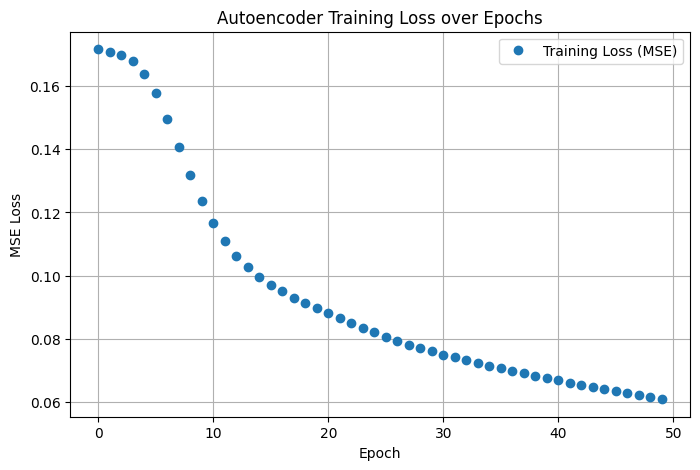

In [ ]:
import matplotlib.pyplot as plt

# Extract loss from training history
loss_values = hist.history['loss']

plt.figure(figsize=(8,5))
plt.plot(loss_values, 'o', label='Training Loss (MSE)')
plt.title('Autoencoder Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()
plt.show()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,178 (1.21 MB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210,786 (823.39 KB)

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_149CLONE           │ (None, 64)             │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,152 (215.44 KB)

 Trainable params: 55,152 (215.44 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
(200, 64)


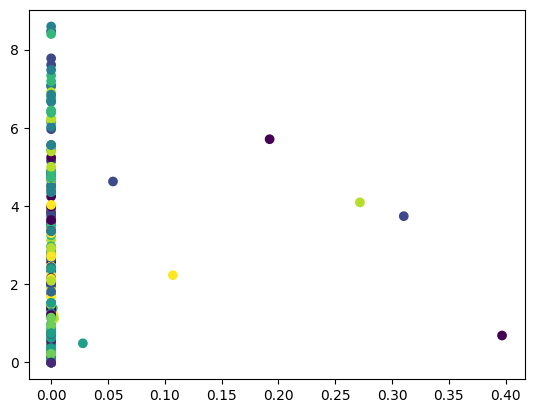

In [ ]:
# dividing the model into encoder and decoder
s_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ae_model.keras')

s_model.summary()
enc_model = tf.keras.models.Model(inputs = s_model.layers[0].input, outputs = s_model.layers[0].output)
enc_model.summary()
dec_model = tf.keras.models.Model(inputs=s_model.layers[1].input, outputs = s_model.layers[-1].output)
dec_model.summary()


# generation of lspace graph
def l_space(d, o, m):
  ev = m.predict(d)
  print(ev.shape)
  plt.scatter(ev[:,0], ev[:,1], c=o)
  plt.show()

l_space(t_x, t_y, enc_model)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted output shape: (200, 784)
Reshaped images: (200, 28, 28)


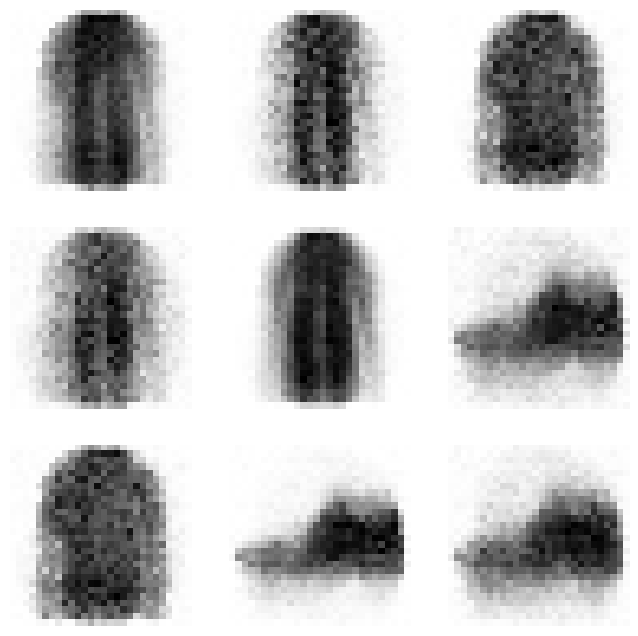

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def out_img(d, m, n):
    # Get model predictions
    res = m.predict(d)
    print("Predicted output shape:", res.shape)

    # Reshape flattened predictions back into 28x28 images
    imgs = res.reshape((d.shape[0], 28, 28))
    print("Reshaped images:", imgs.shape)

    # Plot n×n grid of reconstructed images
    plt.figure(figsize=(8,8))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.imshow(imgs[i], cmap='Greys')
        plt.axis('off')
    plt.show()

# Example usage:
out_img(t_x, s_model, 3)



## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



Epoch 1/30
235/235 - 4s - 18ms/step - loss: 0.4732 - val_loss: 0.4013
Epoch 2/30
235/235 - 4s - 17ms/step - loss: 0.3915 - val_loss: 0.3867
Epoch 3/30
235/235 - 3s - 13ms/step - loss: 0.3819 - val_loss: 0.3799
Epoch 4/30
235/235 - 2s - 9ms/step - loss: 0.3756 - val_loss: 0.3738
Epoch 5/30
235/235 - 2s - 9ms/step - loss: 0.3701 - val_loss: 0.3686
Epoch 6/30
235/235 - 3s - 14ms/step - loss: 0.3657 - val_loss: 0.3647
Epoch 7/30
235/235 - 4s - 16ms/step - loss: 0.3625 - val_loss: 0.3620
Epoch 8/30
235/235 - 3s - 15ms/step - loss: 0.3602 - val_loss: 0.3600
Epoch 9/30
235/235 - 2s - 9ms/step - loss: 0.3584 - val_loss: 0.3586
Epoch 10/30
235/235 - 2s - 9ms/step - loss: 0.3569 - val_loss: 0.3574
Epoch 11/30
235/235 - 3s - 11ms/step - loss: 0.3556 - val_loss: 0.3563
Epoch 12/30
235/235 - 3s - 13ms/step - loss: 0.3546 - val_loss: 0.3554
Epoch 13/30
235/235 - 2s - 10ms/step - loss: 0.3536 - val_loss: 0.3544
Epoch 14/30
235/235 - 2s - 9ms/step - loss: 0.3525 - val_loss: 0.3533
Epoch 15/30
235/235 

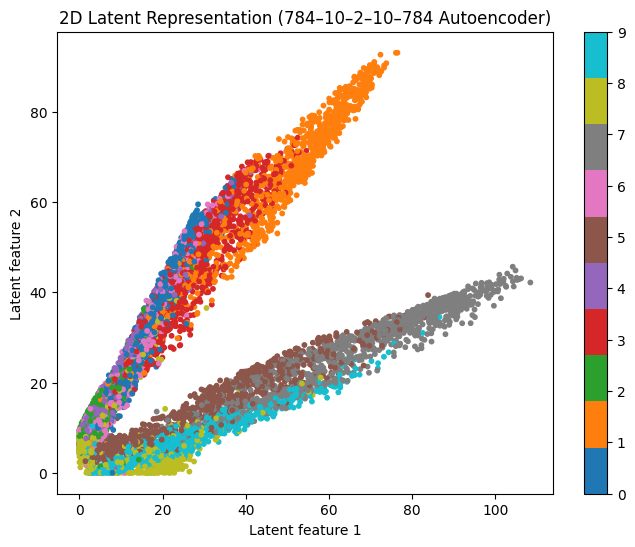

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ---- Load and preprocess Fashion-MNIST ----
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and flatten
x_train = train_images.astype('float32') / 255.0
x_test  = test_images.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test  = x_test.reshape((len(x_test), 28*28))

# ---- Build the deeper Autoencoder ----
from tensorflow.keras import layers, models

input_img = tf.keras.Input(shape=(784,))

# Encoder
h1 = layers.Dense(10, activation='relu')(input_img)
latent = layers.Dense(2, activation='relu')(h1)

# Decoder
h2 = layers.Dense(10, activation='relu')(latent)
output = layers.Dense(784, activation='sigmoid')(h2)

# Autoencoder & Encoder models
autoencoder = tf.keras.Model(input_img, output)
encoder = tf.keras.Model(input_img, latent)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# ---- Train ----
history = autoencoder.fit(
    x_train, x_train,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=2
)

# ---- Encode test data ----
encoded_imgs = encoder.predict(x_test)
print("Encoded latent features shape:", encoded_imgs.shape)

# ---- Plot latent space (2D) ----
plt.figure(figsize=(8,6))
scatter = plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1],
                      c=test_labels, cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10))
plt.title('2D Latent Representation (784–10–2–10–784 Autoencoder)')
plt.xlabel('Latent feature 1')
plt.ylabel('Latent feature 2')
plt.show()


## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [ ]:
Write your code here


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
Write your code here